In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


In [20]:
data = pd.read_csv('country_vaccinations.csv', sep=",")

In [21]:
data.shape

(5236, 15)

In [5]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [6]:
data.isnull().sum()

country                                   0
iso_code                                328
date                                      0
total_vaccinations                     1874
people_vaccinated                      2302
people_fully_vaccinated                3239
daily_vaccinations_raw                 2406
daily_vaccinations                      183
total_vaccinations_per_hundred         1874
people_vaccinated_per_hundred          2302
people_fully_vaccinated_per_hundred    3239
daily_vaccinations_per_million          183
vaccines                                  0
source_name                               6
source_website                            0
dtype: int64

In [7]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))



Всего строк: 5236


# Обработка пропусков в данных 

In [10]:


# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))



Колонка iso_code. Тип данных object. Количество пустых значений 328, 6.26%.
Колонка total_vaccinations. Тип данных float64. Количество пустых значений 1874, 35.79%.
Колонка people_vaccinated. Тип данных float64. Количество пустых значений 2302, 43.96%.
Колонка people_fully_vaccinated. Тип данных float64. Количество пустых значений 3239, 61.86%.
Колонка daily_vaccinations_raw. Тип данных float64. Количество пустых значений 2406, 45.95%.
Колонка daily_vaccinations. Тип данных float64. Количество пустых значений 183, 3.5%.
Колонка total_vaccinations_per_hundred. Тип данных float64. Количество пустых значений 1874, 35.79%.
Колонка people_vaccinated_per_hundred. Тип данных float64. Количество пустых значений 2302, 43.96%.
Колонка people_fully_vaccinated_per_hundred. Тип данных float64. Количество пустых значений 3239, 61.86%.
Колонка daily_vaccinations_per_million. Тип данных float64. Количество пустых значений 183, 3.5%.
Колонка source_name. Тип данных object. Количество пустых значений 6,

Сразу удалим колонки с слишком высоким процентом пропуска данных, далее будем работать с оставшимися колонками. 

In [22]:
# Удаление колонок, содержащих пустые значения
data = data.dropna(axis=1, thresh=3362)
data.shape

(5236, 10)

In [26]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка total_vaccinations. Тип данных float64. Количество пустых значений 1874, 35.79%.
Колонка daily_vaccinations. Тип данных float64. Количество пустых значений 183, 3.5%.
Колонка total_vaccinations_per_hundred. Тип данных float64. Количество пустых значений 1874, 35.79%.
Колонка daily_vaccinations_per_million. Тип данных float64. Количество пустых значений 183, 3.5%.


In [27]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num



,total_vaccinations,daily_vaccinations,total_vaccinations_per_hundred,daily_vaccinations_per_million
0,0.0,NaN,0.00,NaN
1,NaN,64.0,NaN,22.0
2,128.0,64.0,0.00,22.0
3,188.0,63.0,0.01,22.0
4,266.0,66.0,0.01,23.0
...,...,...,...,...
5231,21456.0,2877.0,0.14,194.0
5232,25077.0,3005.0,0.17,202.0
5233,27970.0,2871.0,0.19,193.0
5234,30658.0,2807.0,0.21,189.0


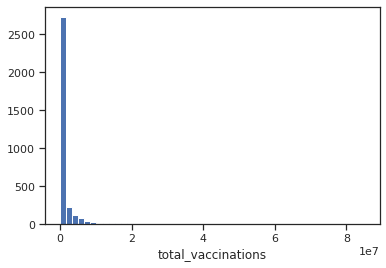

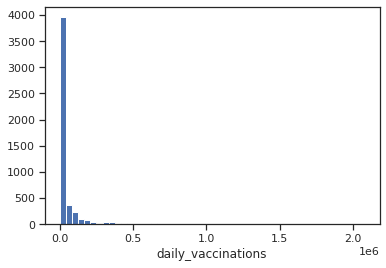

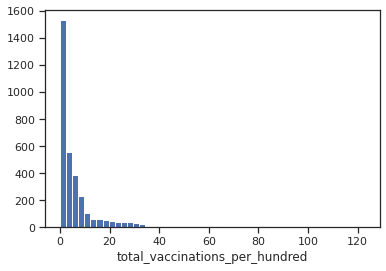

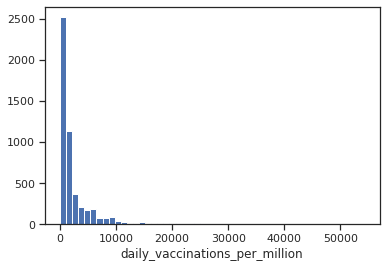

In [28]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Как видно из представленных гистограмм, лучше всего использовать мод в качестве значения при заполнении пропусков.

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator



In [68]:


# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]


    
    
    


In [73]:
test_num_impute_col(data, 'total_vaccinations', 'most_frequent')

('total_vaccinations', 'most_frequent', 1874, 0.0, 0.0)

In [74]:
test_num_impute_col(data, 'daily_vaccinations', 'most_frequent')

('daily_vaccinations', 'most_frequent', 183, 403.0, 403.0)

In [75]:
test_num_impute_col(data, 'total_vaccinations_per_hundred', 'most_frequent')

('total_vaccinations_per_hundred', 'most_frequent', 1874, 0.0, 0.0)

In [76]:
test_num_impute_col(data, 'daily_vaccinations_per_million', 'most_frequent')

('daily_vaccinations_per_million', 'most_frequent', 183, 43.0, 43.0)

# Обработка пропусков в категориальных данных 

In [77]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка iso_code. Тип данных object. Количество пустых значений 328, 6.26%.
Колонка source_name. Тип данных object. Количество пустых значений 6, 0.11%.


In [78]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any', subset=['source_name'])
(data.shape, data_new_2.shape)



((5236, 10), (5230, 10))

In [80]:
cat_temp_data = data[['iso_code']]
cat_temp_data.head()



,iso_code
0,ALB
1,ALB
2,ALB
3,ALB
4,ALB


In [83]:
cat_temp_data['iso_code'].unique()



array(['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUS', 'AUT', 'AZE', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BMU', 'BOL', 'BRA', 'BGR',
       'KHM', 'CAN', 'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP',
       'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', nan, 'EST', 'FRO', 'FLK',
       'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GRL', 'GTM', 'GGY', 'GUY',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'IMN',
       'ISR', 'ITA', 'JPN', 'JEY', 'JOR', 'KAZ', 'KWT', 'LVA', 'LBN',
       'LIE', 'LTU', 'LUX', 'MAC', 'MYS', 'MDV', 'MLT', 'MUS', 'MEX',
       'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MMR', 'NPL', 'NLD', 'NZL',
       'OWID_NCY', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RUS', 'SHN', 'SMR', 'SAU', 'SEN', 'SRB',
       'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'KOR', 'ESP', 'LKA', 'SWE',
       'CHE', 'THA', 'TTO', 'TUR', 'TCA', 'UKR', 'ARE', 'GBR', 'USA',
       'URY', 'VEN', 'ZWE'], dtype=object)

In [84]:
cat_temp_data[cat_temp_data['iso_code'].isnull()].shape

(328, 1)

In [85]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['ALB'],
       ['ALB'],
       ['ALB'],
       ...,
       ['ZWE'],
       ['ZWE'],
       ['ZWE']], dtype=object)

In [86]:
# Пустые значения отсутствуют
np.unique(data_imp2)



array(['AIA', 'ALB', 'AND', 'ARE', 'ARG', 'AUS', 'AUT', 'AZE', 'BEL',
       'BGD', 'BGR', 'BHR', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CYM', 'CYP', 'CZE',
       'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN',
       'FLK', 'FRA', 'FRO', 'GBR', 'GGY', 'GIB', 'GRC', 'GRL', 'GTM',
       'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'ISL', 'ISR', 'ITA', 'JEY', 'JOR', 'JPN', 'KAZ', 'KHM',
       'KOR', 'KWT', 'LBN', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC',
       'MAR', 'MCO', 'MDV', 'MEX', 'MLT', 'MMR', 'MNE', 'MNG', 'MSR',
       'MUS', 'MYS', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'OWID_NCY', 'PAK',
       'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS',
       'SAU', 'SEN', 'SGP', 'SHN', 'SLV', 'SMR', 'SRB', 'SVK', 'SVN',
       'SWE', 'SYC', 'TCA', 'THA', 'TTO', 'TUR', 'UKR', 'URY', 'USA',
       'VEN', 'ZAF', 'ZWE'], dtype=object)

# Преобразование категориальных признаков в числовые

In [87]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,ALB
1,ALB
2,ALB
3,ALB
4,ALB
...,...
5231,ZWE
5232,ZWE
5233,ZWE
5234,ZWE


In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [89]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])



In [90]:
cat_enc['c1'].unique()



array(['ALB', 'DZA', 'AND', 'AIA', 'ARG', 'AUS', 'AUT', 'AZE', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BMU', 'BOL', 'BRA', 'BGR',
       'KHM', 'CAN', 'CYM', 'CHL', 'CHN', 'COL', 'CRI', 'HRV', 'CYP',
       'CZE', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV', 'LTU', 'EST', 'FRO',
       'FLK', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GRL', 'GTM', 'GGY',
       'GUY', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL',
       'IMN', 'ISR', 'ITA', 'JPN', 'JEY', 'JOR', 'KAZ', 'KWT', 'LVA',
       'LBN', 'LIE', 'LUX', 'MAC', 'MYS', 'MDV', 'MLT', 'MUS', 'MEX',
       'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MMR', 'NPL', 'NLD', 'NZL',
       'OWID_NCY', 'NOR', 'OMN', 'PAK', 'PAN', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'QAT', 'ROU', 'RUS', 'SHN', 'SMR', 'SAU', 'SEN', 'SRB',
       'SYC', 'SGP', 'SVK', 'SVN', 'ZAF', 'KOR', 'ESP', 'LKA', 'SWE',
       'CHE', 'THA', 'TTO', 'TUR', 'TCA', 'UKR', 'ARE', 'GBR', 'USA',
       'URY', 'VEN', 'ZWE'], dtype=object)

In [91]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [93]:
le.inverse_transform([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])



array(['AIA', 'ALB', 'AND', 'ARE', 'ARG', 'AUS', 'AUT', 'AZE', 'BEL',
       'BGD', 'BGR', 'BHR', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'CYM', 'CYP', 'CZE',
       'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN',
       'FLK', 'FRA', 'FRO', 'GBR', 'GGY', 'GIB', 'GRC', 'GRL', 'GTM',
       'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'ISL', 'ISR', 'ITA', 'JEY', 'JOR', 'JPN', 'KAZ', 'KHM',
       'KOR', 'KWT', 'LBN', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC',
       'MAR', 'MCO', 'MDV', 'MEX', 'MLT', 'MMR', 'MNE', 'MNG', 'MSR',
       'MUS', 'MYS', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'OWID_NCY', 'PAK',
       'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS',
       'SAU', 'SEN', 'SGP', 'SHN', 'SLV', 'SMR', 'SRB', 'SVK', 'SVN',
       'SWE', 'SYC', 'TCA', 'THA', 'TTO', 'TUR', 'UKR', 'URY', 'USA',
       'VEN', 'ZAF', 'ZWE'], dtype=object)

# Масштабирование

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer



In [97]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['total_vaccinations']])



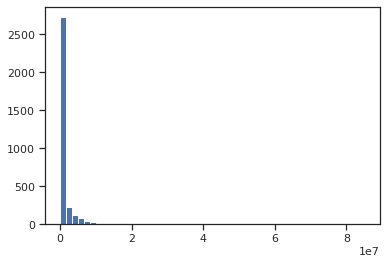

In [98]:
plt.hist(data['total_vaccinations'], 50)
plt.show()



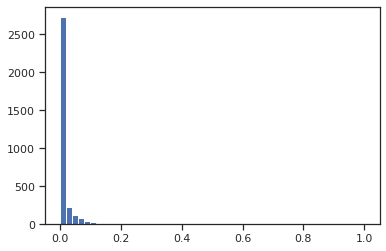

In [99]:
plt.hist(sc1_data, 50)
plt.show()



Как видим по графикам выше, масштабирование не изменило гистограмму. 